# Project 9 -- Zeru Zhou

**TA Help:** NA


    
**Collaboration:** NA
    
- Get help from Dr. Ward's videos

## Question 1

In [1]:
import pandas as pd

In [2]:
dat = pd.read_parquet("/depot/datamine/data/disney/total.parquet")
dat.head()

,datetime,SACTMIN,SPOSTMIN,ride_name,status
0,2015-01-01 08:27:58,NaN,NaN,pirates_of_caribbean,closed
1,2015-01-01 08:56:55,NaN,NaN,pirates_of_caribbean,closed
2,2015-01-01 08:57:38,NaN,NaN,pirates_of_caribbean,closed
3,2015-01-01 08:58:34,NaN,NaN,pirates_of_caribbean,closed
4,2015-01-01 09:24:55,NaN,NaN,pirates_of_caribbean,closed


In [3]:
dat['status'].isna().value_counts()

False    3443445
Name: status, dtype: int64

In [4]:
dat.groupby("ride_name")['status'].count()

ride_name
7_dwarfs_train          321631
alien_saucers           129876
dinosaur                252403
expedition_everest      275274
flight_of_passage       184818
kilimanjaro_safaris     257785
navi_river              182121
pirates_of_caribbean    301946
rock_n_rollercoaster    277509
slinky_dog              135946
soarin                  274770
spaceship_earth         277248
splash_mountain         287948
toy_story_mania         284170
Name: status, dtype: int64

Number of rows for each rides are listed above.

## Question 2

In [5]:
print(f"There are {dat['SPOSTMIN'].notna().sum()} rows that SPOSTMIN is not null")

There are 3146086 rows that SPOSTMIN is not null


In [6]:
print(f"There are {dat['SACTMIN'].notna().sum()} rows that SACTMIN is not null")

There are 96171 rows that SACTMIN is not null


In [7]:
def sort_combine(dat):
    # Find the time before and after
    dat['time_after']=dat['datetime'].shift(-1)
    dat['time_before']=dat['datetime'].shift(1)
    
    # Find the SPOSTMIN before and after value
    dat['SPOSTMIN_after']=dat['SPOSTMIN'].shift(-1)
    dat['SPOSTMIN_before']=dat['SPOSTMIN'].shift(1)
    
    # Find the time difference
    dat['time_diff_after']=dat['datetime']-dat['time_after']
    dat['time_diff_before']=dat['datetime']-dat['time_before']
    
    # Find the shortest time
    dat['Previous_is_shorter'] = dat['time_diff_after'].abs()>dat['time_diff_before'].abs()
    
    # Filter the NA value
    dat = dat.loc[dat['SACTMIN'].notna(), :]
    
    # Replace value
    dat.loc[dat['Previous_is_shorter']==True, 'SPOSTMIN'] = dat.loc[dat['Previous_is_shorter']==True, 'SPOSTMIN_before']
    dat.loc[dat['Previous_is_shorter']!=True, 'SPOSTMIN'] = dat.loc[dat['Previous_is_shorter']!=True, 'SPOSTMIN_after']
    
    # Time difference
    dat.loc[dat['Previous_is_shorter']==True, 'time_diff'] = dat.loc[dat['Previous_is_shorter']==True, 'time_diff_before']
    dat.loc[dat['Previous_is_shorter']!=True, 'time_diff'] = dat.loc[dat['Previous_is_shorter']!=True, 'time_diff_after']
    
    # Drop Variables
    dat = dat.drop(columns = ['time_after', 'time_before', 'SPOSTMIN_after', 'SPOSTMIN_before', 'time_diff_after', 'time_diff_before', 'Previous_is_shorter'])
    
    # Return data
    return(dat)
    

In [8]:
reduced = dat.groupby('ride_name').apply(sort_combine).reset_index(drop=True)
reduced.head()

,datetime,SACTMIN,SPOSTMIN,ride_name,status,time_diff
0,2015-01-01 08:05:30,54.0,60.0,7_dwarfs_train,open,0 days 00:03:17
1,2015-01-01 08:22:16,55.0,60.0,7_dwarfs_train,open,-1 days +23:59:04
2,2015-01-02 12:20:00,160.0,120.0,7_dwarfs_train,open,-1 days +23:56:49
3,2015-01-02 21:49:47,65.0,60.0,7_dwarfs_train,open,-1 days +23:58:35
4,2015-01-03 00:44:09,19.0,60.0,7_dwarfs_train,open,-1 days +23:55:22


New dataframe and columns are created.

## Question 3

In [9]:
reduced.shape

(96171, 6)

In [10]:
dat.shape

(3443445, 5)

In [11]:
3443445-96171

3347274

In [12]:
reduced.groupby('ride_name').median().sort_values('SACTMIN', ascending=True)

,SACTMIN,SPOSTMIN
ride_name,,
spaceship_earth,7.0,15.0
expedition_everest,13.0,20.0
pirates_of_caribbean,16.0,25.0
dinosaur,17.0,20.0
kilimanjaro_safaris,18.0,30.0
alien_saucers,21.0,30.0
soarin,22.0,30.0
splash_mountain,22.0,35.0
toy_story_mania,23.0,35.0


<AxesSubplot:xlabel='ride_name'>

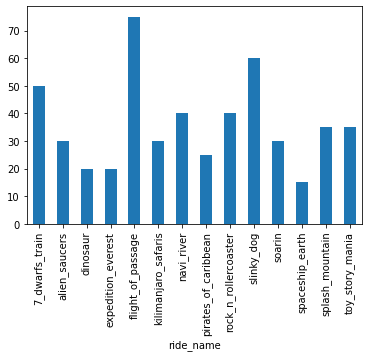

In [13]:
reduced.groupby('ride_name')['SPOSTMIN'].median().plot.bar()

Reduced dataframe is 3347274 rows less than the original one. The median is closer in compare to the original one. It is close enough to be able to draw compariations because we could see that the time differences are at most few minutes.

## Question 4

In [20]:
reduced = reduced.loc[reduced['time_diff'].abs() <= '0 days 01:00:00']
reduced.shape

(95947, 6)

In [21]:
reduced['SPOSTMIN_is_greater']=reduced['SPOSTMIN']>reduced['SACTMIN']

In [23]:
Count = reduced.groupby('ride_name')['SPOSTMIN_is_greater'].value_counts()

<AxesSubplot:xlabel='ride_name,SPOSTMIN_is_greater'>

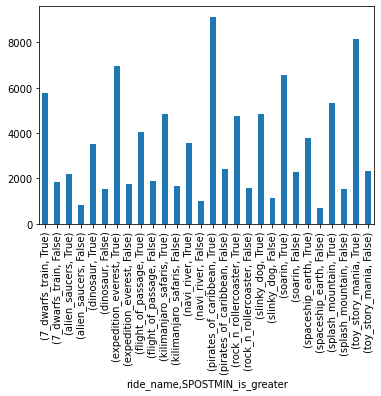

In [24]:
Count.plot.bar()

Question: For different ride names, how many of rows are the SPOSTMIN greater than SACTMIN? Hypothesis: In most cases SPOSTMIN would be greater than SACTMIN. The graph is drawn above, and we found that indeed in most cases, SPOSTMINs are greater than  SACTMINs.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.